<a href="https://colab.research.google.com/github/Timure228/LSTM_Based_Text_Generator/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn
from torch.nn import RNN, LSTM

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

import regex
import string

import numpy as np

In [ ]:
FILE = "space_6.txt"
with open(FILE, "r") as f:
  lines_amount = f.read().count("\n") + 1

lines_amount

448

In [ ]:
translator = str.maketrans('', '', string.punctuation)

In [ ]:
with open(FILE, "r") as f:
  sentences = f.read().split(".")
  sentences = [i.strip().translate(translator).lower() for i in sentences]
  sentences = [i for i in sentences if i !='']

sentences

['archivename spacereferences\nlastmodified date 930401 143921 \n    astronomical society of the pacific\n    1290 24th avenue\n    san francisco ca 94122\n\tmore expensive but better organized slide sets',
 'cambridge university press\n    32 east 57th street\n    new york ny 10022\n    crawfordpeters aeronautica\n    p',
 'o',
 'box 152528\n    san diego ca 92115\n\tan excellent source of all kinds of space publications',
 'they publish\n\ta number of catalogs including\n\t    aviation and space 19451962\n\t    aviation and space 19621990\n\t    space and related titles\n    european southern observatory\n    information and photographic service\n    dr r',
 'm',
 'west\n    karl scharzschild strasse 2\n    d8046 garching bei munchen\n\tslide sets posters photographs conference proceedings',
 'finley holiday film corporation\n    12607 east philadelphia street\n    whittier california 90601\n\twide selection of apollo shuttle viking and voyager slides at 50\n\tcentsslide',
 'call for

In [ ]:
# Separate the data
length = len(sentences)
train_text = sentences[:int(length*0.8)]
test_text = sentences[int(length*0.8):]

len(train_text), len(test_text)

(218, 55)

In [ ]:
joined_text = "".join(sentences)

# Unique characters
characters = sorted(list(set(joined_text)))

# Tokenize
tokens = []
for i in sentences:
  for j in i.split():
    tokens.append(j)

tokens = list(set(tokens))
vocab_size = len(tokens)
tokens[:10]

['getting',
 '148',
 'even',
 'surprising',
 '132',
 'asp',
 'volatiles',
 'textbook',
 'hansen',
 'munchen']

In [65]:
indx_to_token = {indx: token for indx, token in enumerate(tokens)}
token_to_indx = {token: indx for indx, token in enumerate(tokens)}

In [ ]:
# Create encode function
def encode(arr: list, token_to_indx=token_to_indx):
  encoded_sentences = []
  for j in range(len(arr)):
    encoded_sentences.append([token_to_indx[i] for i in arr[j].split()])
  return encoded_sentences

train_encoded_sentences = encode(train_text, token_to_indx)
test_encoded_sentences = encode(test_text, token_to_indx)
print(train_encoded_sentences, end='')

[[111, 384, 1153, 816, 135, 1287, 1328, 630, 1078, 69, 501, 741, 1006, 1092, 1150, 1158, 793, 106, 1502, 510, 412, 682, 338, 1407, 985], [333, 764, 483, 635, 697, 86, 863, 276, 937, 721, 351, 643, 166, 1193], [216], [448, 705, 1150, 156, 793, 446, 177, 712, 279, 1078, 1392, 1294, 1078, 738, 147], [480, 1152, 506, 693, 1078, 981, 181, 418, 680, 738, 1147, 418, 680, 738, 692, 738, 680, 38, 939, 727, 132, 1498, 322, 680, 537, 119, 1130, 145], [1308], [395, 1478, 1320, 464, 927, 832, 194, 962, 9, 1407, 985, 959, 733, 473, 1211], [1355, 1344, 687, 1030, 495, 697, 357, 863, 689, 52, 1120, 846, 1489, 1078, 190, 1424, 607, 680, 575, 332, 1274, 610, 1123], [573, 1093, 506, 323], [8, 470, 354, 1413, 989, 241, 508, 1299, 278, 1407, 985], [588, 1020, 1066, 334, 1093, 663, 29], [672, 680, 491, 1107, 990, 35, 1148, 66, 768, 10, 188, 810, 1081, 1407, 985, 668, 183, 1375], [1164, 170, 634, 813, 660, 1092, 276, 937, 721, 246, 1066, 513, 1030, 930, 448, 850, 1216, 871, 339, 536, 1066, 1292, 224], [1309,

In [ ]:
# Creating the sequences
X_train = []
y_train = []

X_test = []
y_test = []

def create_sequence(X: list, y: list, encoded_sentences: list):
  for i in encoded_sentences:
    for j in range(1, len(i)):
      X.append(i[:j])
      y.append(i[j:])
  return X, y

X_train, y_train = create_sequence(X_train, y_train, train_encoded_sentences)
X_test, y_test = create_sequence(X_test, y_test, test_encoded_sentences)

X_test[:16]

[[1233],
 [1233, 506],
 [1233, 506, 312],
 [1233, 506, 312, 588],
 [1233, 506, 312, 588, 1274],
 [1233, 506, 312, 588, 1274, 69],
 [1233, 506, 312, 588, 1274, 69, 1074],
 [1233, 506, 312, 588, 1274, 69, 1074, 1078],
 [1233, 506, 312, 588, 1274, 69, 1074, 1078, 69],
 [1233, 506, 312, 588, 1274, 69, 1074, 1078, 69, 515],
 [1233, 506, 312, 588, 1274, 69, 1074, 1078, 69, 515, 1229],
 [1233, 506, 312, 588, 1274, 69, 1074, 1078, 69, 515, 1229, 1210],
 [1233, 506, 312, 588, 1274, 69, 1074, 1078, 69, 515, 1229, 1210, 103],
 [1233, 506, 312, 588, 1274, 69, 1074, 1078, 69, 515, 1229, 1210, 103, 506],
 [1233,
  506,
  312,
  588,
  1274,
  69,
  1074,
  1078,
  69,
  515,
  1229,
  1210,
  103,
  506,
  312],
 [1233,
  506,
  312,
  588,
  1274,
  69,
  1074,
  1078,
  69,
  515,
  1229,
  1210,
  103,
  506,
  312,
  1275]]

In [ ]:
# Padding X and y
X_train_padded = pad_sequences(X_train, maxlen=41, padding='post', value=0)  # 'post' means pad at the end of each sequence
y_train_padded = pad_sequences(y_train, maxlen=41, padding='post', value=0)

X_test_padded = pad_sequences(X_test, maxlen=41, padding='post', value=0)
y_test_padded = pad_sequences(y_test, maxlen=41, padding='post', value=0)

In [ ]:
print(f"X Shape: {X_train_padded.shape} | y shape: {y_train_padded.shape}")

X Shape: (2382, 41) | y shape: (2382, 41)


In [ ]:
# Converting X and y to categorical vectors
X_train_cat = tf.keras.utils.to_categorical(X_train_padded, num_classes=vocab_size)
y_train_cat = tf.keras.utils.to_categorical(y_train_padded, num_classes=vocab_size)

X_test_cat = tf.keras.utils.to_categorical(X_test_padded, num_classes=vocab_size)
y_test_cat = tf.keras.utils.to_categorical(y_test_padded, num_classes=vocab_size)

In [ ]:
# Check the ranks of X and y
print(f"X Rank: {tf.rank(X_train_cat)} | y Rank: {tf.rank(y_train_cat)}")
print(f"X Shape: {X_train_cat.shape} | y shape: {y_train_cat.shape}")
print(f"X Type: {type(X_train_cat)} | y Type: {type(y_train_cat)}")

X Rank: 3 | y Rank: 3
X Shape: (2382, 41, 1513) | y shape: (2382, 41, 1513)
X Type: <class 'numpy.ndarray'> | y Type: <class 'numpy.ndarray'>


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout

In [ ]:
model = Sequential()
model.add(keras.layers.Input(shape=(41, 1513)))
model.add(Dropout(rate=0.2))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
history = model.fit(X_train_cat, y_train_cat, epochs=20, verbose=1)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 216ms/step - accuracy: 0.7210 - loss: 1.5160
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - accuracy: 0.7192 - loss: 1.5113
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 203ms/step - accuracy: 0.7224 - loss: 1.4776
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 193ms/step - accuracy: 0.7225 - loss: 1.4605
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 198ms/step - accuracy: 0.7148 - loss: 1.5270
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.7236 - loss: 1.4369
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.7195 - loss: 1.4392
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 193ms/step - accuracy: 0.7284 - loss: 1.4052
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 197ms/step - accuracy: 0.7209 - loss: 1.4068
Epoch 10/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - accuracy: 0.7156 - loss: 1.4296
Epoch 11/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 199ms/step - accuracy: 0.7267 - loss: 1.3700
Epoch 12/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 20

In [60]:
# Model structure
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 41, 1513)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 41, 64)              │         403,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 41, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 41, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 41, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 41, 1513)            │          98,345 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,618,493 (6.17 MB)

 Trainable params: 539,497 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,078,996 (4.12 MB)

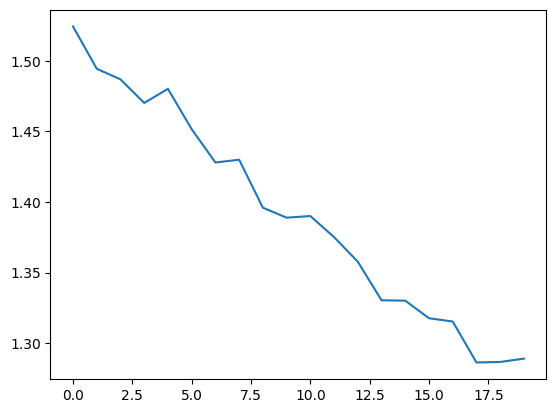

In [61]:
# Plot the Loss Curve
import matplotlib.pyplot as plt

plt.plot(history.epoch, history.history["loss"])

In [62]:
input_string = ["because"]
input_string_arr = encode(input_string)
input_string_arr = pad_sequences(input_string_arr, maxlen=41, padding="post", value=0)
input_string_arr = tf.keras.utils.to_categorical(input_string_arr, num_classes=vocab_size)
input_string_arr.shape

y_preds = model.predict(input_string_arr)
labels = tf.argmax(y_preds, axis=1)

" ".join(input_string + [indx_to_token[int(labels[0][i])] for i in range(19) if int(labels[0][i]) != 0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


'because solid even even even 148'

In [55]:
# Evaluating the model
model.evaluate(X_test_cat, y_test_cat)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.7032 - loss: 7.2651


[10.3720703125, 0.6139425039291382]